In [11]:
# Import all the necessory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
%matplotlib inline

import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import warnings
warnings.filterwarnings("ignore")

In [12]:

data = pd.read_csv('spotify_churn_dataset.csv')

In [13]:
#Display the first 5 rows of the dataframe
data.head().T

,0,1,2,3,4
user_id,1,2,3,4,5
gender,Female,Other,Male,Female,Other
age,54,33,38,22,29
country,CA,DE,AU,CA,US
subscription_type,Free,Family,Premium,Student,Family
listening_time,26,141,199,36,250
songs_played_per_day,23,62,38,2,57
skip_rate,0.2,0.34,0.04,0.31,0.36
device_type,Desktop,Web,Mobile,Mobile,Mobile
ads_listened_per_week,31,0,0,0,0


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,8000.0,4000.500000,2309.545410,1.0,2000.75,4000.5,6000.25,8000.0
age,8000.0,37.662125,12.740359,16.0,26.00,38.0,49.00,59.0
listening_time,8000.0,154.068250,84.015596,10.0,81.00,154.0,227.00,299.0
songs_played_per_day,8000.0,50.127250,28.449762,1.0,25.00,50.0,75.00,99.0
skip_rate,8000.0,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
ads_listened_per_week,8000.0,6.943875,13.617953,0.0,0.00,0.0,5.00,49.0
offline_listening,8000.0,0.747750,0.434331,0.0,0.00,1.0,1.00,1.0
is_churned,8000.0,0.258875,0.438044,0.0,0.00,0.0,1.00,1.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [16]:
data.shape

(8000, 12)

In [17]:
# Check for missing values
data.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [19]:
data['gender'].unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [23]:
data['subscription_type'].unique()

array(['Free', 'Family', 'Premium', 'Student'], dtype=object)

In [24]:
data['country'].unique()

array(['CA', 'DE', 'AU', 'US', 'UK', 'IN', 'FR', 'PK'], dtype=object)

In [25]:
data['device_type'].unique()

array(['Desktop', 'Web', 'Mobile'], dtype=object)

In [ ]:
# group customers into age groups
def age_lab(data):
    x = data["age"]
    if x <= 24:
        return "age_16-24"
    elif x <= 48:
        return "age_24-48"
    else:
        return "age_48-60"
    

data["age_group"] = data.apply(age_lab, axis=1)

In [29]:
data.head().T

,0,1,2,3,4
user_id,1,2,3,4,5
gender,Female,Other,Male,Female,Other
age,54,33,38,22,29
country,CA,DE,AU,CA,US
subscription_type,Free,Family,Premium,Student,Family
listening_time,26,141,199,36,250
songs_played_per_day,23,62,38,2,57
skip_rate,0.2,0.34,0.04,0.31,0.36
device_type,Desktop,Web,Mobile,Mobile,Mobile
ads_listened_per_week,31,0,0,0,0


In [32]:
# counting the number of customers in each tenure group
data["age_group"].value_counts()

age_group
age_24-48    4281
age_48-60    2052
age_16-24    1667
Name: count, dtype: int64

In [ ]:
data['gender'].value_counts()

gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

In [40]:
#replace values in churn column
data["offline_listening"] = data["offline_listening"].replace({1:"Yes",0:"No"})

In [41]:
data.head().T

,0,1,2,3,4
user_id,1,2,3,4,5
gender,Female,Other,Male,Female,Other
age,54,33,38,22,29
country,CA,DE,AU,CA,US
subscription_type,Free,Family,Premium,Student,Family
listening_time,26,141,199,36,250
songs_played_per_day,23,62,38,2,57
skip_rate,0.2,0.34,0.04,0.31,0.36
device_type,Desktop,Web,Mobile,Mobile,Mobile
ads_listened_per_week,31,0,0,0,0


In [35]:
#replace values in churn column
data["Churn"] = data["is_churned"].replace({1:"Yes",0:"No"})

In [36]:
data.head().T

,0,1,2,3,4
user_id,1,2,3,4,5
gender,Female,Other,Male,Female,Other
age,54,33,38,22,29
country,CA,DE,AU,CA,US
subscription_type,Free,Family,Premium,Student,Family
listening_time,26,141,199,36,250
songs_played_per_day,23,62,38,2,57
skip_rate,0.2,0.34,0.04,0.31,0.36
device_type,Desktop,Web,Mobile,Mobile,Mobile
ads_listened_per_week,31,0,0,0,0


In [37]:
# counting the number of customers in each churn group
data["Churn"].value_counts()

Churn
No     5929
Yes    2071
Name: count, dtype: int64

In [38]:
data["Churn"].value_counts(normalize=True)

Churn
No     0.741125
Yes    0.258875
Name: proportion, dtype: float64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   object 
 11  is_churned             8000 non-null   int64  
 12  age_group              8000 non-null   object 
 13  Churn                  8000 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 875.1+ 

How many unique customers are there in the dataset?

In [107]:
# 2.3. How many unique customers are there in the dataset?
unique_customers = data['user_id'].nunique()
print(f"There are {unique_customers} unique customers in the dataset.")

There are 8000 unique customers in the dataset.


Which country has the maximum number of unique customers?

In [ ]:
# 2.4. Which country has the maximum number of unique customers?
country_customer_counts = data.groupby('country')['user_id'].nunique().sort_values(ascending=False)
most_customers_country = country_customer_counts.index[0]
print(f"The country with the maximum number of unique customers is: {most_customers_country}")
country_customer_counts.head()

## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the distribution of variables and their relationship with the churn variable. This may include visualizations like histograms, box plots, and count plots.

**Focus**:
Generate histograms for numerical columns to visualize their distributions and box plots to identify outliers and compare distributions across churn categories.

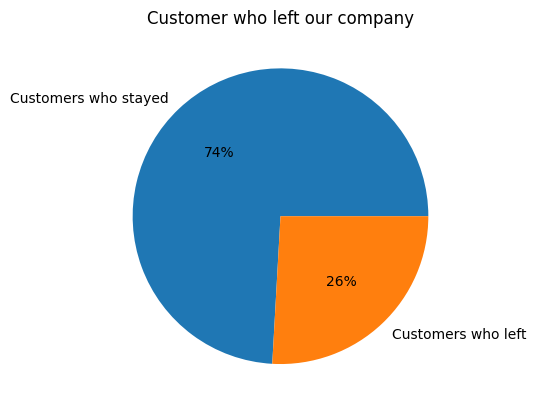

In [45]:
# firstly lets see a piechart distribution of churned customers
#labels
key = data["Churn"].value_counts().keys().tolist()
#values
val = data["Churn"].value_counts().values.tolist()

#changing labels which is more readable for stakeholders
key = ['Customers who stayed', 'Customers who left']

# define Seaborn color palette to use
#palette_color = sns.color_palette('tab10')

# plotting data on chart
plt.pie(val, labels=key, autopct='%.0f%%')

plt.title('Customer who left our company')

# displaying chart
plt.show()

In [52]:
# identifying numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('user_id') # removing customer id because it's not relevant
numerical_cols.remove('is_churned') 
#numerical_cols.remove('Churn') #removing the target variable form numerical columns

In [53]:
numerical_cols

['age',
 'listening_time',
 'songs_played_per_day',
 'skip_rate',
 'ads_listened_per_week']

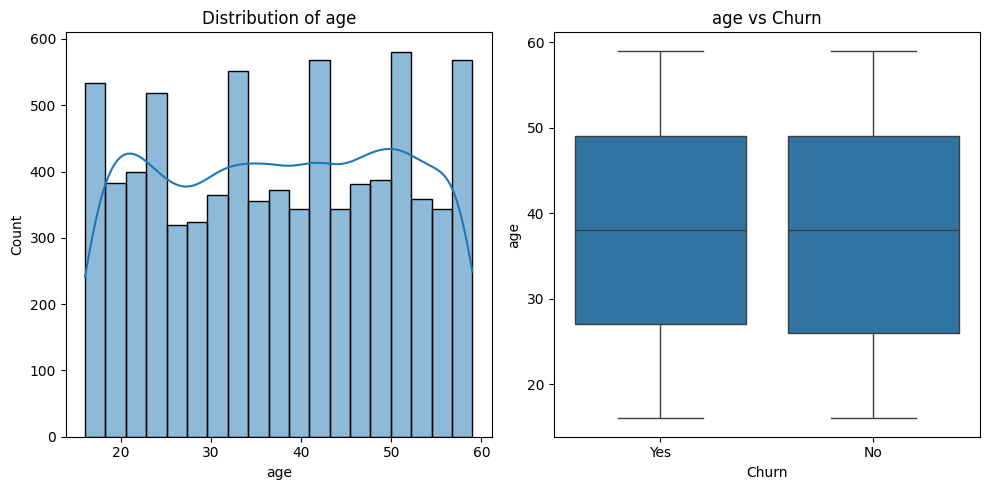

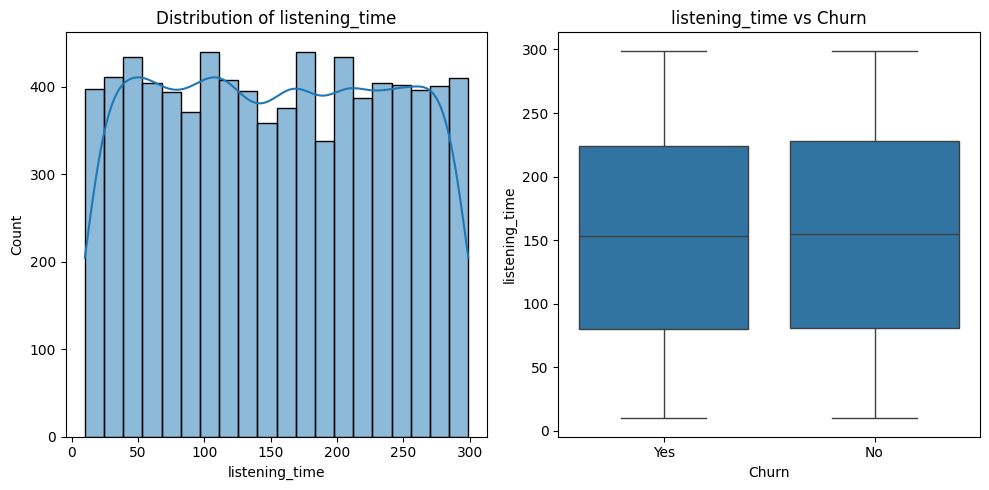

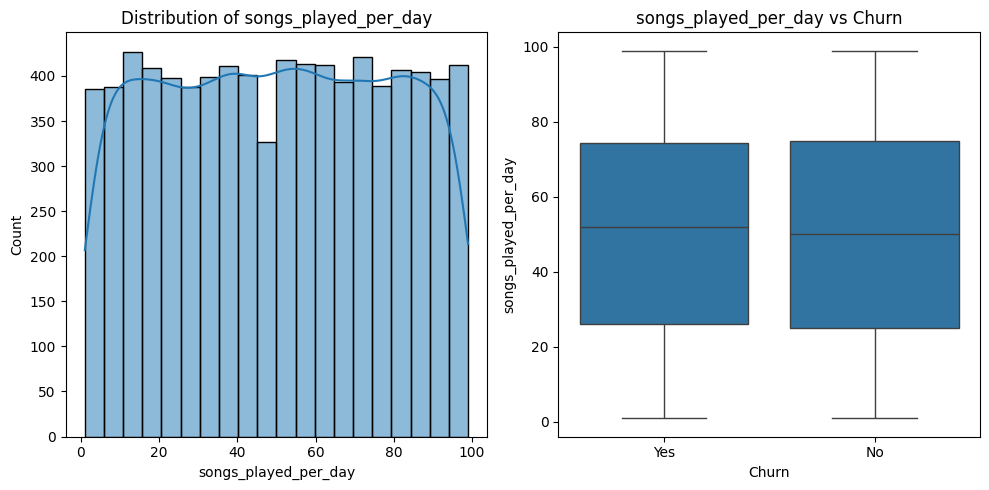

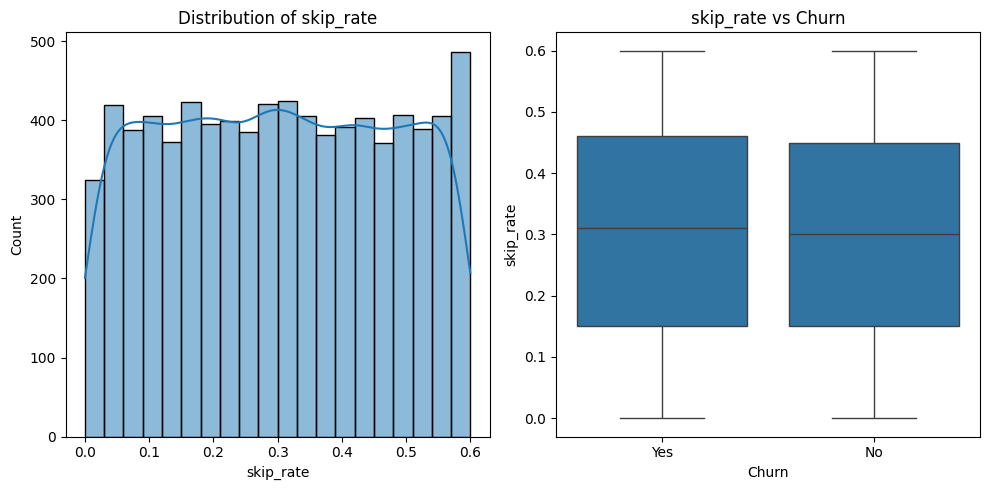

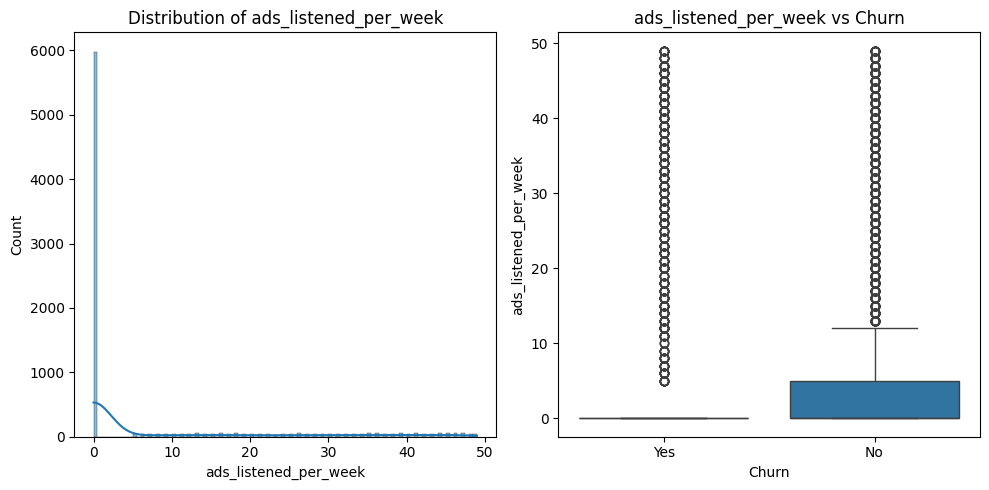

In [58]:
# Visualizing distributions and box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()

In [72]:
data['country'].value_counts().sort_values(ascending=False)

country
AU    1034
US    1032
DE    1015
IN    1011
PK     999
FR     989
UK     966
CA     954
Name: count, dtype: int64

In [69]:
# Analyzing churn rate by CityTier
churn_by_country = data.groupby('country')['Churn'].value_counts(normalize=True).unstack()#.fillna(0)
#churn_by_country= churn_by_country.sort_values(ascending=False)
#churn_by_city_tier['Yes'] = churn_by_city_tier['Yes']

display(churn_by_country)

most_churned_country = churn_by_country['Yes'].idxmax()
print(f"\nThe country with the highest churn rate is: City Tier {most_churned_country}")

Churn,No,Yes
country,,
AU,0.742747,0.257253
CA,0.751572,0.248428
DE,0.727094,0.272906
FR,0.728008,0.271992
IN,0.756677,0.243323
PK,0.724725,0.275275
UK,0.752588,0.247412
US,0.746124,0.253876



The country with the highest churn rate is: City Tier PK


country
DE    13.375181
PK    13.278609
FR    12.988894
AU    12.844037
US    12.650893
IN    11.878320
UK    11.540319
CA    11.443747
Name: count, dtype: float64

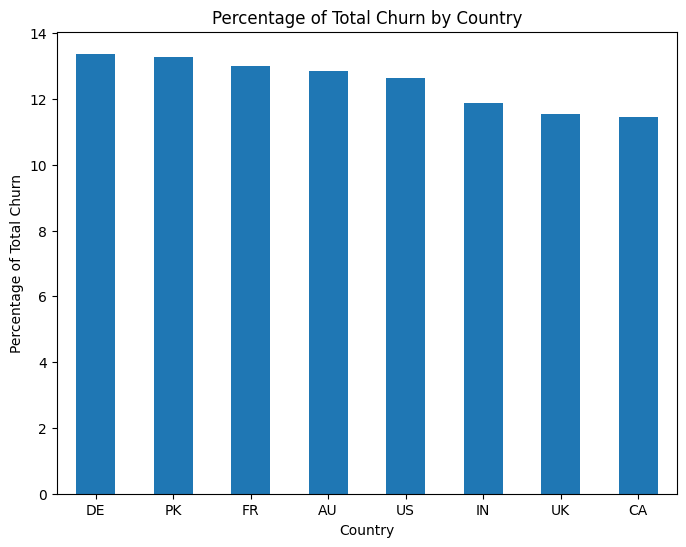


The city tier contributing the highest percentage to overall churn is: City Tier DE


In [ ]:
# Filter for churned customers
churned_customers = data[data['Churn'] == 'Yes']

# Count churned customers by country
churn_counts_by_country = churned_customers['country'].value_counts()

# Calculate the total number of churned customers
total_churned = churn_counts_by_country.sum()

# Calculate the percentage of total churn for each country
churn_percentage_by_country = (churn_counts_by_country / total_churned) * 100

display(churn_percentage_by_country)

# Plot the percentage of total churn by city tier
plt.figure(figsize=(8, 6))
churn_percentage_by_country.plot(kind='bar')
plt.title('Percentage of Total Churn by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Total Churn')
plt.xticks(rotation=0)
plt.show()

most_churned_country_overall = churn_percentage_by_country.idxmax()
print(f"\nThe country contributing the highest percentage to overall churn is: City Tier {most_churned_country_overall}")

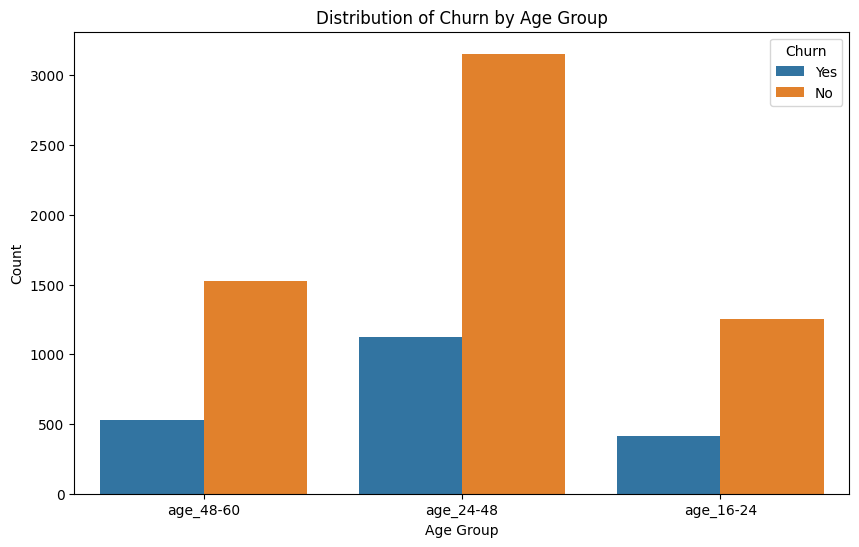

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='Churn', data=data)
plt.title('Distribution of Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Focus**:
Generate count plots for categorical columns to visualize the frequency of each category and compare distributions across different categories of churn.

In [79]:
data.head().T
#data.info()

,0,1,2,3,4
user_id,1,2,3,4,5
gender,Female,Other,Male,Female,Other
age,54,33,38,22,29
country,CA,DE,AU,CA,US
subscription_type,Free,Family,Premium,Student,Family
listening_time,26,141,199,36,250
songs_played_per_day,23,62,38,2,57
skip_rate,0.2,0.34,0.04,0.31,0.36
device_type,Desktop,Web,Mobile,Mobile,Mobile
ads_listened_per_week,31,0,0,0,0


In [80]:
# Find all categorical columns
cat_cols = data.select_dtypes(exclude= np.number)
cat_cols = cat_cols.drop('Churn', axis =1)


# Look at all unique values in each categorical column
for col in cat_cols:
    print(f"\n{col} : {data[col].unique()}")


gender : ['Female' 'Other' 'Male']

country : ['CA' 'DE' 'AU' 'US' 'UK' 'IN' 'FR' 'PK']

subscription_type : ['Free' 'Family' 'Premium' 'Student']

device_type : ['Desktop' 'Web' 'Mobile']

offline_listening : ['No' 'Yes']

age_group : ['age_48-60' 'age_24-48' 'age_16-24']


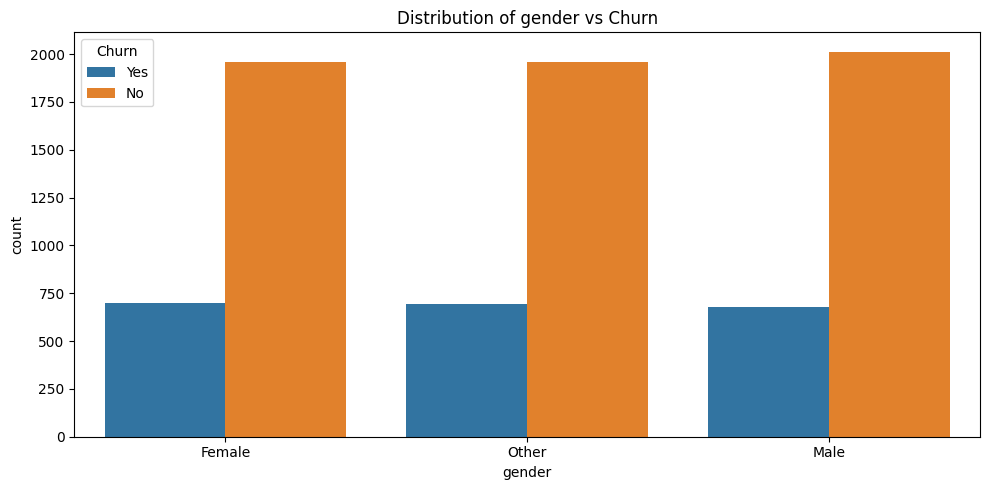

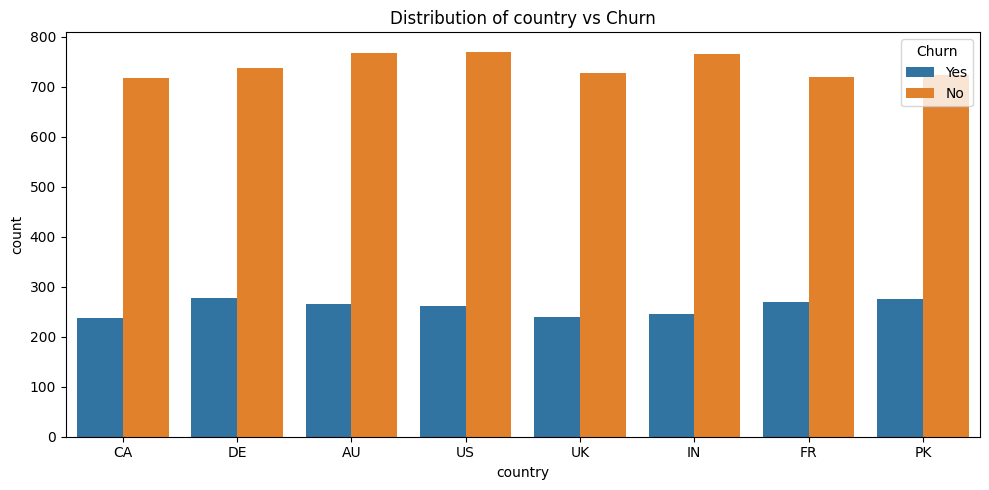

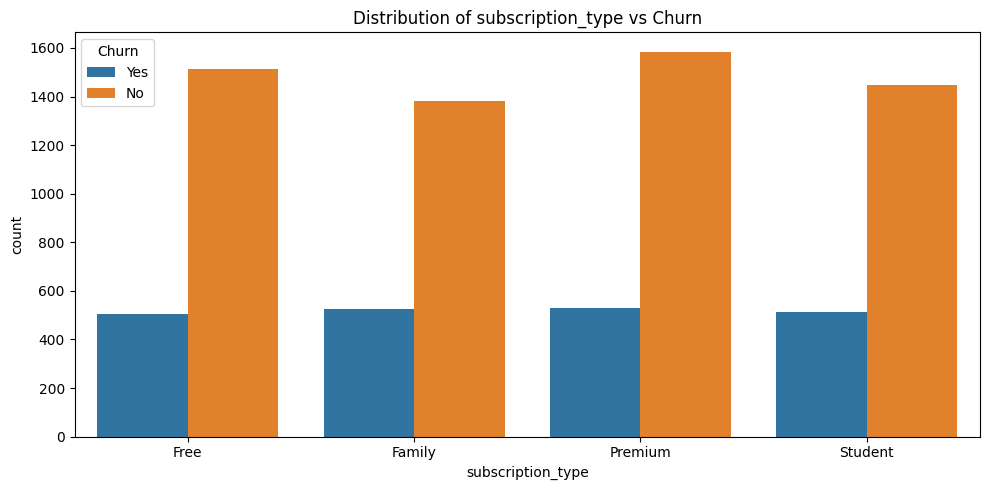

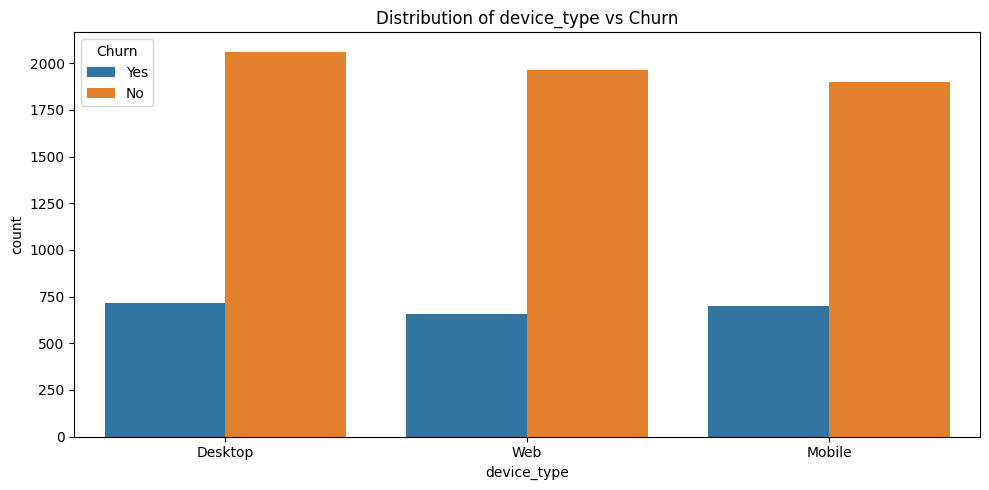

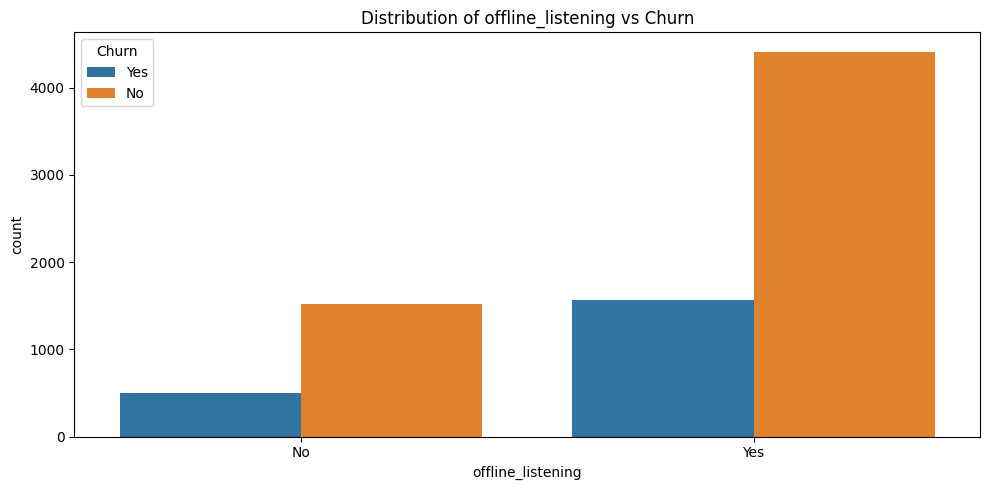

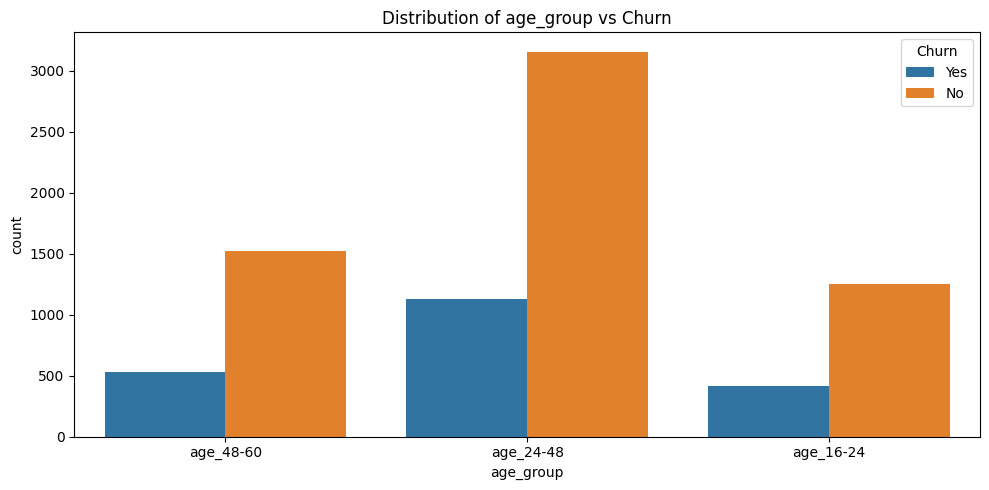

In [83]:
# categorical_cols = data.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'Distribution of {col} vs Churn')
    #plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Correlation analysis

### Subtask:
Calculate and visualize the correlation matrix to identify relationships between numerical variables and the churn variable.

## Correlation analysis

### Subtask:
Calculate and visualize the correlation matrix to identify relationships between numerical variables and the churn variable.

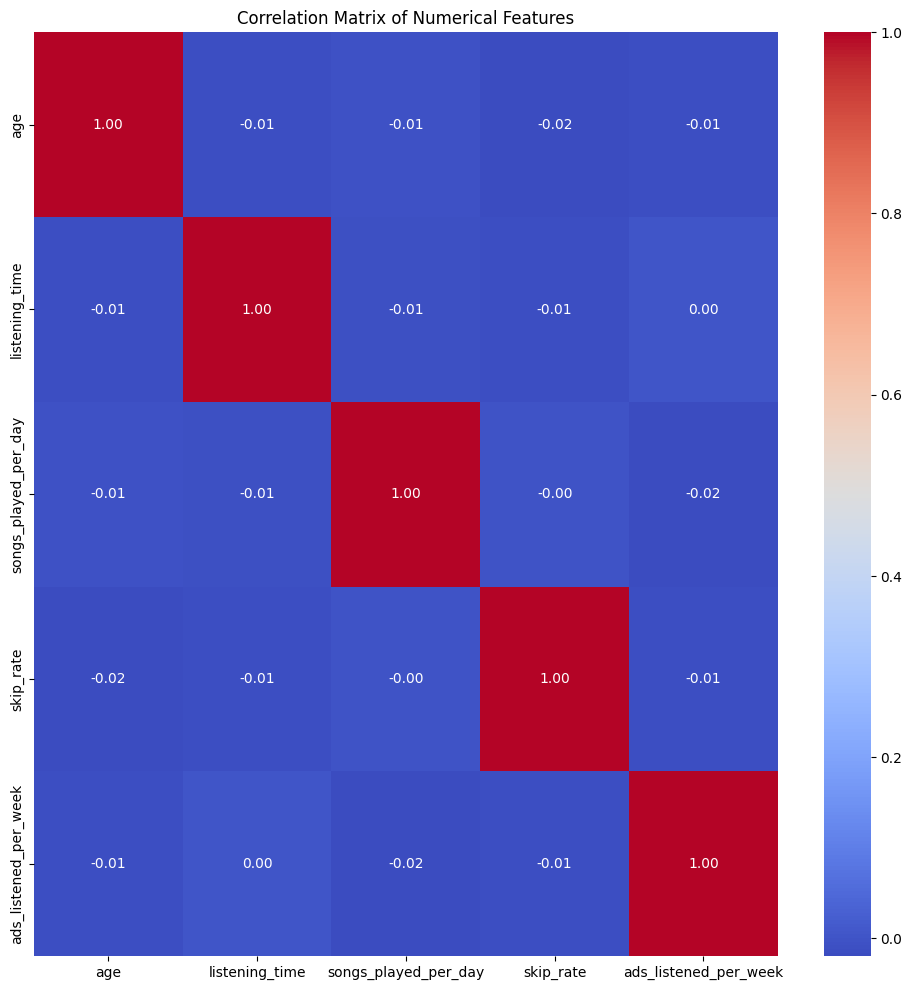

In [86]:
# viewing the correlation heatmap before scaling
numerical_data = data.select_dtypes(include=np.number)
numerical_data = numerical_data.drop('user_id', axis =1)
numerical_data = numerical_data.drop('is_churned', axis =1)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# lets scale the numerical, binary and categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=np.number)
numerical_cols = numerical_cols.drop('user_id', axis =1)
numerical_cols = numerical_cols.drop('is_churned', axis =1)
binary_cols = data.nunique()[data.nunique()==2].keys().tolist()
#binary_data = binary_data[binary_data == 2].index.tolist()
categorical_cols = data.select_dtypes(exclude=np.number)
categorical_cols = [i for i in categorical_cols if i not in binary_cols]
numerical_data_scaled = scaler.fit_transform(numerical_cols)
le = LabelEncoder()
for i in binary_cols :
    data[i] = le.fit_transform(data[i])

#Duplicating columns for categorical columns
data = pd.get_dummies(data = data,columns = categorical_cols)
#numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

#numerical_data_scaled.T

In [89]:
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

numerical_data_scaled.head().T

,0,1,2,3,4
age,1.282452,-0.365956,0.026522,-1.229408,-0.679939
listening_time,-1.524434,-0.155555,0.534836,-1.405401,1.141904
songs_played_per_day,-0.953574,0.417349,-0.426296,-1.691763,0.241590
skip_rate,-0.576827,0.229702,-1.498575,0.056875,0.344921
ads_listened_per_week,1.766611,-0.509938,-0.509938,-0.509938,-0.509938


In [90]:
# drop numeric columns and add scaled column
#basically we are replacing numerical columns with scaled data
data = data.drop(columns = numerical_cols,axis = 1)
data1 = data.merge(numerical_data_scaled,left_index=True,right_index=True,how = "left")

data1.head().T

,0,1,2,3,4
user_id,1,2,3,4,5
offline_listening,0,1,1,1,1
is_churned,1,0,1,0,1
Churn,1,0,1,0,1
gender_Female,True,False,False,True,False
gender_Male,False,False,True,False,False
gender_Other,False,True,False,False,True
country_AU,False,False,True,False,False
country_CA,True,False,False,True,False
country_DE,False,True,False,False,False


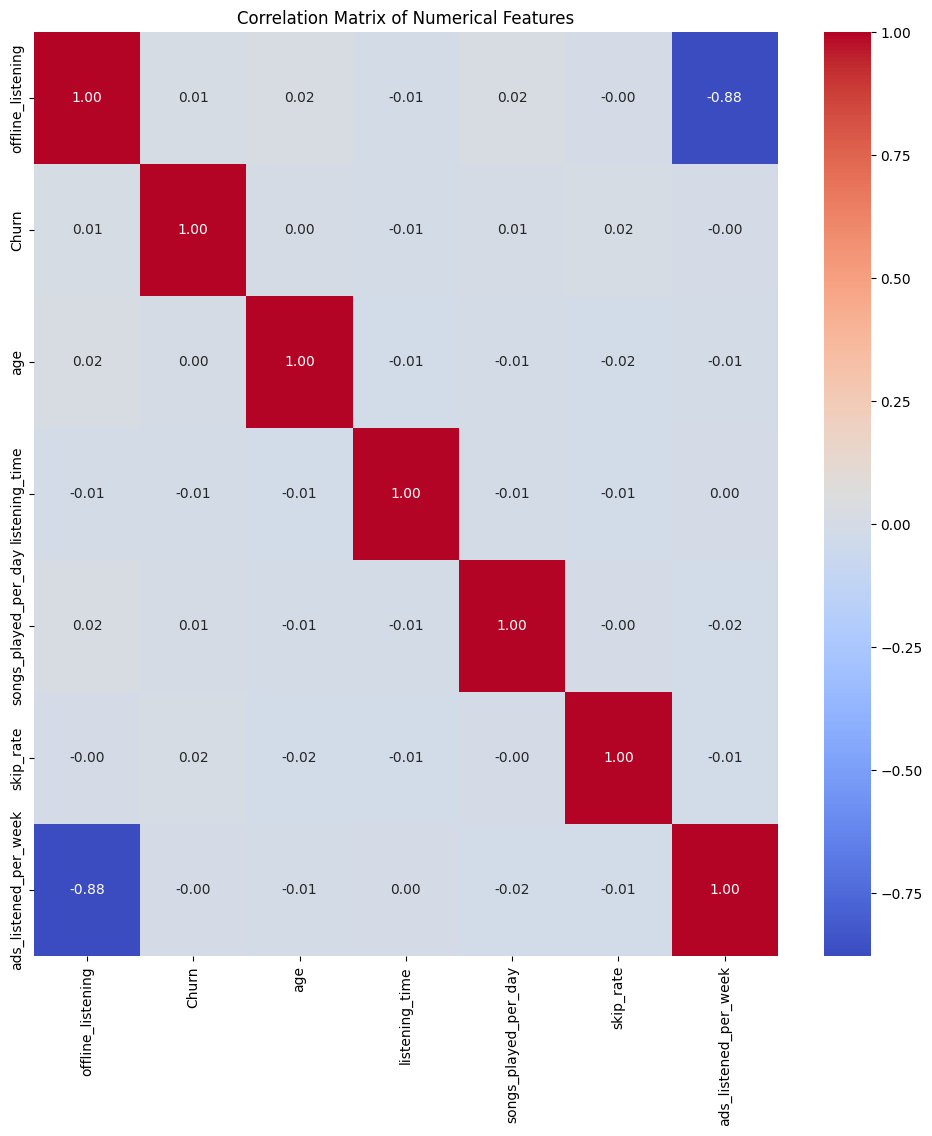

In [93]:
# viewing the correlation heatmap after scaling
numerical_data = data1.select_dtypes(include=np.number)
numerical_data = numerical_data.drop('user_id', axis =1)
numerical_data = numerical_data.drop('is_churned', axis =1)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Focus**:
Based on the correlation analysis, ''listening_time'' showed the strongest negative correlation with churn, while 'skip_rate' showed the strongest positive correlation. I will analyze the descriptive statistics for churned and non-churned customers and visualize the mean differences using bar plots.


In [94]:
# Calculate descriptive statistics for selected variables by Churn
selected_vars = ['listening_time', 'skip_rate']
churn_stats = data1.groupby('Churn')[selected_vars].agg(['mean', 'median', 'std']).transpose()
display(churn_stats)

Churn                         0         1
listening_time mean    0.004506 -0.012900
               median  0.011091 -0.012716
               std     1.003725  0.989630
skip_rate      mean   -0.009528  0.027277
               median -0.000735  0.056875
               std     0.998527  1.004187

## Decision tree model

### Subtask:
Build and evaluate a Decision Tree model for churn prediction.

**Focus**:
Build and evaluate a Decision Tree model for churn prediction by instantiating, training, predicting, and calculating evaluation metrics.


In [96]:
# Define features (X) and target (y)
X = data1.drop(['user_id', 'Churn', 'is_churned'], axis=1)
y = data1['Churn']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 27)
Shape of X_test: (1600, 27)
Shape of y_train: (6400,)
Shape of y_test: (1600,)


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Instantiate and fit the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate and print evaluation metrics
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))

# Calculate and print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model Evaluation:
Accuracy: 0.62625
Precision: 0.275
Recall: 0.3025
F1-score: 0.28809523809523807
ROC AUC Score: 0.5183333333333333

Confusion Matrix:
[[881 319]
 [279 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1200
           1       0.28      0.30      0.29       400

    accuracy                           0.63      1600
   macro avg       0.52      0.52      0.52      1600
weighted avg       0.64      0.63      0.63      1600



## Logistic regression model

### Subtask:
Build and evaluate a Logistic Regression model for churn prediction.

**Focus**:
Instantiate, train, and evaluate the Logistic Regression model using the prepared training and testing data.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Instantiate a Logistic Regression model
lr_model = LogisticRegression(random_state=42, solver='liblinear')

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1] # Get probability of the positive class (churn)

# Calculate and print evaluation metrics
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))

# Calculate and print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Model Evaluation:
Accuracy: 0.75
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC Score: 0.52225

Confusion Matrix:
[[1200    0]
 [ 400    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1200
           1       0.00      0.00      0.00       400

    accuracy                           0.75      1600
   macro avg       0.38      0.50      0.43      1600
weighted avg       0.56      0.75      0.64      1600



## Model comparison and selection

### Subtask:
Compare the performance of the Decision Tree and Logistic Regression models and select the best model.

**Focus**:
Compare the evaluation metrics of the Decision Tree and Logistic Regression models and select the best model based on these metrics, considering the importance of balancing precision and recall in churn prediction.

In [99]:
# Compare evaluation metrics
print("Model Performance Comparison:")
print("-" * 30)
print("Metric         | Decision Tree | Logistic Regression")
print("-" * 30)
print(f"Accuracy       | {accuracy_score(y_test, y_pred_dt):<13.4f} | {accuracy_score(y_test, y_pred_lr):<19.4f}")
print(f"Precision      | {precision_score(y_test, y_pred_dt):<13.4f} | {precision_score(y_test, y_pred_lr):<19.4f}")
print(f"Recall         | {recall_score(y_test, y_pred_dt):<13.4f} | {recall_score(y_test, y_pred_lr):<19.4f}")
print(f"F1-score       | {f1_score(y_test, y_pred_dt):<13.4f} | {f1_score(y_test, y_pred_lr):<19.4f}")
print(f"ROC AUC Score  | {roc_auc_score(y_test, y_pred_proba_dt):<13.4f} | {roc_auc_score(y_test, y_pred_proba_lr):<19.4f}")
print("-" * 30)

# Determine the best model
# In churn prediction, balancing precision and recall is important.
# A higher F1-score indicates a better balance.
# Also, ROC AUC score is a good overall measure of the model's ability to distinguish classes.

if f1_score(y_test, y_pred_dt) > f1_score(y_test, y_pred_lr):
    best_model = "Decision Tree"
elif f1_score(y_test, y_pred_dt) < f1_score(y_test, y_pred_lr):
     best_model = "Logistic Regression"
else:
    if roc_auc_score(y_test, y_pred_proba_dt) > roc_auc_score(y_test, y_pred_proba_lr):
        best_model = "Decision Tree"
    else:
        best_model = "Logistic Regression"


print(f"\nBased on the evaluation metrics, the best model for churn prediction is the {best_model} model.")

# Briefly explain the reasoning
if best_model == "Decision Tree":
    print("Reasoning: The Decision Tree model achieved higher scores across most metrics, " \
    "particularly F1-score and ROC AUC score, indicating a better balance between precision and " \
    "recall and overall discriminative power compared to the Logistic Regression model.")
else:
    print("Reasoning: The Logistic Regression model achieved higher scores across most metrics," \
    " particularly F1-score and ROC AUC score, indicating a better balance between precision and recall and " \
    "overall discriminative power compared to the Decision Tree model.")

Model Performance Comparison:
------------------------------
Metric         | Decision Tree | Logistic Regression
------------------------------
Accuracy       | 0.6262        | 0.7500             
Precision      | 0.2750        | 0.0000             
Recall         | 0.3025        | 0.0000             
F1-score       | 0.2881        | 0.0000             
ROC AUC Score  | 0.5183        | 0.5222             
------------------------------

Based on the evaluation metrics, the best model for churn prediction is the Decision Tree model.
Reasoning: The Decision Tree model achieved higher scores across most metrics, particularly F1-score and ROC AUC score, indicating a better balance between precision and recall and overall discriminative power compared to the Logistic Regression model.


## Customer Segmentation
We will segment customers based on listening behavior using KMeans clustering.

In [124]:
df_temp = pd.read_csv('spotify_churn_dataset.csv')


# Grouping by Subscription type
grouped_by_subscription_type = df_temp.groupby('subscription_type')
print("Descriptive statistics for each subscription type:")
print(grouped_by_subscription_type.describe())

Descriptive statistics for each subscription type:
                  user_id                                                  \
                    count         mean          std  min      25%     50%   
subscription_type                                                           
Family             1908.0  3971.270964  2290.965365  2.0  1988.75  3962.5   
Free               2018.0  3991.758176  2296.840926  1.0  1980.75  4000.5   
Premium            2115.0  3998.234515  2331.511863  3.0  1975.00  3976.0   
Student            1959.0  4040.419091  2318.000830  4.0  2040.50  4047.0   

                                       age             ... offline_listening  \
                       75%     max   count       mean  ...               75%   
subscription_type                                      ...                     
Family             5929.50  7995.0  1908.0  38.082285  ...               1.0   
Free               5987.75  8000.0  2018.0  37.287909  ...               0.0   
Premium  

In [109]:
# Perform KMeans clustering for segmentation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

features = ['listening_time','songs_played_per_day','skip_rate']
X = data1[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data1['segment'] = kmeans.fit_predict(X_scaled)

# Visualize segments
fig = px.scatter(data1, x='listening_time', y='songs_played_per_day', color='segment', title='Customer Segmentation')
fig.show()

In [113]:
data1.head().T

,0,1,2,3,4
user_id,1,2,3,4,5
offline_listening,0,1,1,1,1
is_churned,1,0,1,0,1
Churn,1,0,1,0,1
gender_Female,True,False,False,True,False
gender_Male,False,False,True,False,False
gender_Other,False,True,False,False,True
country_AU,False,False,True,False,False
country_CA,True,False,False,True,False
country_DE,False,True,False,False,False


## Customer Behavior Analysis
Analyze patterns in skip rate, ads listened, and offline listening.

In [125]:
# Visualize skip rate distribution
fig = px.histogram(df_temp, x='skip_rate', nbins=20, title='Skip Rate Distribution')
fig.show()

# Create a temporary dataframe for plotting with original categorical columns
# Re-load data to get original 'subscription_type' column for plotting
df_temp = pd.read_csv('spotify_churn_dataset.csv')

# Apply necessary transformations to df_temp that don't involve one-hot encoding 'subscription_type'
def age_lab(data):
    x = data["age"]
    if x <= 24:
        return "age_16-24"
    elif x <= 48:
        return "age_24-48"
    else:
        return "age_48-60"

df_temp["age_group"] = df_temp.apply(age_lab, axis=1)
df_temp["offline_listening"] = df_temp["offline_listening"].replace({1:"Yes",0:"No"})
df_temp["Churn"] = df_temp["is_churned"].replace({1:"Yes",0:"No"})


# Ads listened per week
fig = px.box(df_temp, x='subscription_type', y='ads_listened_per_week', title='Ads Listened per Week by Subscription Type')
fig.show()

# Offline listening analysis
fig = px.histogram(df_temp, x='offline_listening', title='Offline Listening Distribution')
fig.show()

## Customer Lifetime Value (CLV)
Estimate CLV using listening time and subscription type with discounted cash flow.

In [123]:
# Calculate monthly revenue and discounted CLV
df_temp['monthly_revenue'] = df_temp['listening_time'] * 0.5
df_temp['months_active'] = np.random.randint(1, 24, size=len(df_temp))
discount_rate = 0.01
df_temp['discounted_clv'] = df_temp.apply(lambda row: sum([row['monthly_revenue'] / ((1+discount_rate)**m) for m in range(1, row['months_active']+1)]), axis=1)

# Visualize CLV distribution
fig = px.histogram(df_temp, x='discounted_clv', nbins=30, title='Discounted CLV Distribution')
fig.show()